In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_files_to_do(aGSC):

    aGSC = 'MetricResults--%s'%aGSC
    specie_tmp = aGSC.split('--')[1].split('__')[1].split('_')[1]
    algo = 'NoScaling__LR_l2_1.0'
    combos = []
    # get file names needed
    # hs emebddings
    networks = ['BioGRID', 'IMP']
    method = ['SVD','Pecanpy']
    dims = ['500','2000','10000']
    SVD_params = ['StdScl','None']
    p_q = [('0.1','0.1'),('0.01','0.1'),('0.001','0.1'),('0.0001','0.1'),('0.1','0.01'),('0.1','0.001'),('0.1','0.0001')]
    for anet in networks:
        for adim in dims:
            if (specie_tmp=='mm') and (adim=='10000') and(anet=='BioGRID'):
                continue
            for ameth in method:
                if ameth == 'SVD':
                    for item in SVD_params:
                        mystring = '%s--%s__%s_raw__eggnog_direct_AllOnes__%s_%s_%s.emb--%s'%(aGSC,specie_tmp,anet,ameth,adim,item,algo)
                        combos.append(mystring)
                elif ameth == 'Pecanpy':
                    for item in p_q:
                        if anet == 'BioGRID':
                            mystring = '%s--%s__%s_raw__eggnog_direct_AllOnes__%s_%s_SparseOTF_%s_%s_120_8_10_weighted_undirected.emb--%s'%(aGSC,specie_tmp,anet,ameth,adim,item[0],item[1],algo)
                        elif anet == 'IMP':
                            mystring = '%s--%s__%s_raw__eggnog_direct_AllOnes__%s_%s_DenseOTF_%s_%s_120_8_10_weighted_undirected.emb--%s'%(aGSC,specie_tmp,anet,ameth,adim,item[0],item[1],algo)
                        combos.append(mystring)
    # hs_mm embeddings
    networks = ['BioGRID', 'IMP']
    weights = ['AllOnes','AllFives','SummedDegree-0.50','SummedDegree-1.0']
    method = ['SVD','Pecanpy']
    dims = ['500','2000','10000']
    SVD_params = ['StdScl','None']
    p_q = [('0.1','0.1'),('0.01','0.1'),('0.001','0.1'),('0.0001','0.1'),('0.1','0.01'),('0.1','0.001'),('0.1','0.0001')]
    for anet in networks:
        for aw in weights:
            if aw in ['AllOnes','AllFives']:
                edges = 'undirected'
            elif aw in ['SummedDegree-0.50','SummedDegree-1.0']:
                edges = 'directed'
            for adim in dims:
                for ameth in method:
                    if ameth == 'SVD':
                        for item in SVD_params:
                            mystring = '%s--hs_mm__%s_raw__eggnog_direct_%s__%s_%s_%s.emb--%s'%(aGSC,anet,aw,ameth,adim,item,algo)
                            combos.append(mystring)
                    elif ameth == 'Pecanpy':
                        for item in p_q:
                            if anet == 'BioGRID':
                                mystring = '%s--hs_mm__%s_raw__eggnog_direct_%s__%s_%s_SparseOTF_%s_%s_120_8_10_weighted_%s.emb--%s'%(aGSC,anet,aw,ameth,adim,item[0],item[1],edges,algo)
                            elif anet == 'IMP':
                                mystring = '%s--hs_mm__%s_raw__eggnog_direct_%s__%s_%s_DenseOTF_%s_%s_120_8_10_weighted_%s.emb--%s'%(aGSC,anet,aw,ameth,adim,item[0],item[1],edges,algo)
                            combos.append(mystring)
    # adj mat inf single species
    networks = ['BioGRID', 'IMP']
    for anet in networks:
        mystring = '%s--%s__%s_raw__eggnog_direct_AllOnes.adj--%s'%(aGSC,specie_tmp,anet,algo)
        combos.append(mystring)
        mystring = '%s--%s__%s_inf-0.8__eggnog_direct_AllOnes.adj--%s'%(aGSC,specie_tmp,anet,algo)
        combos.append(mystring)
        mystring = '%s--%s__%s_inf-0.8-trans__eggnog_direct_AllOnes.adj--%s'%(aGSC,specie_tmp,anet,algo)
        combos.append(mystring)
    # adj mat and inf human and mouse
    networks = ['BioGRID', 'IMP']
    weights = ['AllOnes','AllFives','SummedDegree-0.50','SummedDegree-1.0']
    for anet in networks:
        for aw in weights:
            mystring = '%s--hs_mm__%s_raw__eggnog_direct_%s.adj--%s'%(aGSC,anet,aw,algo)
            combos.append(mystring)
            # do for both regular and trans
            mystring = '%s--hs_mm__%s_inf-0.8__eggnog_direct_%s.adj--%s'%(aGSC,anet,aw,algo)
            combos.append(mystring)
            mystring = '%s--hs_mm__%s_inf-0.8-trans__eggnog_direct_%s.adj--%s'%(aGSC,anet,aw,algo)
            combos.append(mystring)
    # add the all species networks
    p_qs = ['0.0001_0.1','0.001_0.1','0.01_0.1','0.1_0.1','0.1_0.01','0.1_0.001','0.1_0.0001']
    dim_size = ['500','2000','10000']
    networks = ['BioGRID','IMP']
    for apq in p_qs:
        for adim in dim_size:
            for anet in networks:
                if anet == 'BioGRID':
                    mystring = '%s--ce_dm_dr_hs_mm_sc__%s_raw__eggnog_direct_SummedDegree-0.50__Pecanpy_%s_SparseOTF_%s_120_8_10_weighted_directed.emb--%s'%(aGSC,anet,adim,apq,algo)
                elif anet == 'IMP':
                    mystring = '%s--ce_dm_dr_hs_mm_sc__%s_raw__eggnog_direct_SummedDegree-0.50__Pecanpy_%s_DenseOTF_%s_120_8_10_weighted_directed.emb--%s'%(aGSC,anet,adim,apq,algo)
                combos.append(mystring)
    print('The total of number of combos to try is',len(combos))
    # print(combos[0:10])
    return combos

def read_in_files(combos):
    fp_results = '../results/metrics/'
    all_FNs = glob.glob(fp_results +'MetricResults*.tsv')
    all_FNs = [item.strip().split('/')[-1].split('.t')[0] for item in all_FNs]
    df_final = pd.DataFrame()
    for aFN in combos:
        if aFN not in all_FNs:
            print('This file is not in the results',aFN)
            continue
        results_aFN = []
        with open(fp_results+aFN+'.tsv', 'r') as f:
            for idx,line in enumerate(f):
                line = line.strip().split('\t')
                inds = [0,1,2,4,3,5,13,14]
                if idx == 0:
                    col_names = [line[item] for item in inds]
                    col_names.pop(4)
                    col_names.insert(4,'dim_size')
                    col_names.insert(5,'emb_params')
                    col_names.insert(6,'net_con_data')
                    col_names.insert(7,'net_con_weight')
                else:
                    good_vals = []
                    for aind in inds:
                        if aind == 4:
                            if line[aind] == 'adj':
                                if 'trans' in line[1]:
                                    good_vals.append(line[2]+'-'+line[aind]+'-'+'-'.join(line[1].split('_')[1].split('-')[0:2]))
                                    good_vals.append('max')
                                    good_vals.append('Trans')
                                else:
                                    good_vals.append(line[2]+'-'+line[aind]+'-'+line[1].split('_')[1])
                                    good_vals.append('max')
                                    good_vals.append('NoVals')
                            else:
                                good_vals.append(line[2]+'-'+line[aind].split('_')[0]+'-'+line[1].split('_')[1])
                                good_vals.append(line[aind].split('_')[1])
                                if 'SVD' in line[aind]:
                                    good_vals.append(line[aind].split('_')[2])
                                elif 'Pecanpy' in line[aind]:
                                    good_vals.append('_'.join(line[aind].split('_')[2:8]))
                        elif aind == 3:
                            net_con_vals = line[aind].split('_')
                            good_vals.append(net_con_vals[0]+'-'+net_con_vals[1])
                            good_vals.append(net_con_vals[2])
                        elif (aind == 13) or (aind == 14):
                            good_vals.append(float(line[aind]))
                        elif aind == 1:
                            good_vals.append(line[aind].split('_')[0])
                        elif aind == 5:
                            good_vals.append(line[aind].split('__')[0])
                        else:
                            good_vals.append(line[aind])
                    results_aFN.append(good_vals)
        df_aFN = pd.DataFrame(results_aFN,columns=col_names)
        df_final = pd.concat([df_final,df_aFN])
    print('The shape of df_final is', df_final.shape)
    return df_final

def make_best(aGSC,df_final):
    df_tmp = df_final[df_final['GSC_info']==aGSC]
    feat_cols = ['dim_size','emb_params','net_con_data','net_con_weight','model_info']
    for idx, acol in enumerate(feat_cols):
        if idx == 0:
            df_tmp['all_params'] = df_tmp[acol]
        else:
            df_tmp['all_params'] = df_tmp['all_params'] + '--'
            df_tmp['all_params'] = df_tmp['all_params'] + df_tmp[acol]
#     print(df_tmp.shape)
#     df_tmp.head()
    networks = ['BioGRID','IMP']
    best_sets = []
    for anet in networks:
        df_tmp2 = df_tmp[df_tmp['network']==anet]
        all_feats = df_tmp2['feature_type'].unique()
        for afeat in all_feats:
            df_tmp3 = df_tmp2[df_tmp2['feature_type']==afeat]
            all_params = df_tmp3['all_params'].unique()
            med_val = -10
            best_set = 'Start'
            for aparam in all_params:
                df_tmp4 = df_tmp3[df_tmp3['all_params']==aparam]
                med_val_tmp = np.median(df_tmp4['log2p'].to_numpy())
                if med_val_tmp > med_val:
                    med_val = med_val_tmp
                    best_set = aparam
            best_sets.append([anet,afeat,best_set,med_val])
    df_best = pd.DataFrame()
    for aset in best_sets:
        df_tmp5 = df_tmp[(df_tmp['network']==aset[0]) &
                         (df_tmp['feature_type']==aset[1]) &
                         (df_tmp['all_params']==aset[2])]
        df_best = pd.concat([df_best,df_tmp5])
        
    # add to df best with embeddings sleected for later
    specie_tmp = aGSC.split('__')[1].split('_')[1]
    species = [(specie_tmp,"AllOnes") ,("hs_mm",'SummedDegree-0.50'), ("ce_dm_dr_hs_mm_sc",'SummedDegree-0.50')]
    nets = [("BioGRID","SparseOTF"),("IMP","DenseOTF")]
    for aspecies in species:
        for anet in nets:
            df_tmp6 = df_tmp[(df_tmp['network']==anet[0]) &
                             (df_tmp['feature_type']==f"{aspecies[0]}-Pecanpy-raw") &
                             (df_tmp['emb_params']==f"{anet[1]}_0.1_0.001_120_8_10") &
                             (df_tmp['dim_size']=="2000") &
                             (df_tmp['net_con_data']=='eggnog-direct') &
                             (df_tmp['net_con_weight']==f'{aspecies[1]}')]
            if (aspecies[0] == "hs") or (aspecies[0] == "mm"):
                sp_name = "single"
            elif aspecies[0] == "hs_mm":
                sp_name = "hs-mm"
            else:
                sp_name = "all species"
            df_tmp6['feature_type'] = [f"N2Vused ({sp_name})"] * df_tmp6.shape[0]
            df_best = pd.concat([df_best,df_tmp6])
    print('The shape of df_best is',df_best.shape)
    return df_best

In [3]:
%%capture --no-display
aGSC = 'MethodNum-0__GO_hs_20_100_0.5_0.5'
combos = find_files_to_do(aGSC)
df_final = read_in_files(combos)
df_best_GO_hs = make_best(aGSC,df_final)
aGSC = 'MethodNum-0__GO_mm_20_100_0.5_0.5'
combos = find_files_to_do(aGSC)
df_final = read_in_files(combos)
df_best_GO_mm = make_best(aGSC,df_final)
aGSC = 'MethodNum-0__Monarch_hs_20_100_0.5_0.5'
combos = find_files_to_do(aGSC)
df_final = read_in_files(combos)
df_best_Mon_hs = make_best(aGSC,df_final)
aGSC = 'MethodNum-0__Monarch_mm_20_100_0.5_0.5'
combos = find_files_to_do(aGSC)
df_final = read_in_files(combos)
df_best_Mon_mm = make_best(aGSC,df_final)

In [4]:
def make_SM_plot(df_best_list):
    fig,ax = plt.subplots(2,4,figsize=(13,8))
    for idx, item in enumerate(df_best_list):
        df_best = item[0]
        specie_tmp = item[1]
        for idx2, anet in enumerate(["BioGRID","IMP"]):
            df_plot = df_best[df_best['network']==anet]
            df_plot = df_plot.replace({'feature_type':{'hs_mm-SVD-raw':"SVD (hs-mm)",
                                                       'hs_mm-Pecanpy-raw': 'N2V (hs-mm)',
                                                       'hs_mm-adj-raw': 'AdjMat (hs-mm)',
                                                       'hs_mm-adj-inf-0.8':'RWR (hs-mm)',
                                                       'ce_dm_dr_hs_mm_sc-Pecanpy-raw': 'N2V (all species)',
                                                       f'{specie_tmp}-SVD-raw': 'SVD (single)',
                                                       f'{specie_tmp}-Pecanpy-raw': 'N2V (single)',
                                                       f'{specie_tmp}-adj-raw': 'AdjMat (single)',
                                                       f'{specie_tmp}-adj-inf-0.8':'RWR (single)'}})
                
            myorder = ['N2V (all species)', 'N2Vused (all species)', 'N2V (hs-mm)', 'N2Vused (hs-mm)',
                       'N2V (single)', 'N2Vused (single)']
            df_plot2 = df_plot[df_plot["feature_type"].isin(myorder)]
            new_specs = []
            new_used = []
            for afeat in df_plot2['feature_type'].tolist():
                if "used" in afeat:
                    new_used.append("Selected")
                else:
                    new_used.append("Best")
                if "all species" in afeat:
                    new_specs.append("all-species")
                elif "hs-mm" in afeat:
                    new_specs.append("hs-mm")
                elif "single" in afeat:
                    new_specs.append("single")
            df_plot2["NewSpecs"] = new_specs
            df_plot2["Used?"] = new_used
            sns.boxplot(data=df_plot2,y='NewSpecs',x='log2p',hue='Used?',showfliers=False,
                        notch=True,order=["all-species","hs-mm","single"],orient="h",ax=ax[idx2,idx])
            ax[idx2,idx].get_legend().remove()
            if idx == 0:
                ax[idx2,idx].set_ylabel("")
            else:
                ax[idx2,idx].set_ylabel("")
                ax[idx2,idx].set_yticklabels("")
            if idx2 == 0:
                ax[idx2,idx].set_xlabel("")
            else:
                ax[idx2,idx].set_xlabel("log2(auPRC/prior)")
    ax[0,0].set_title('Human')
    ax[0,1].set_title('Mouse')
    ax[0,2].set_title('Human')
    ax[0,3].set_title('Mouse')
    ax[1,3].legend(ncol=2,loc="center",bbox_to_anchor=(-1.3,-0.25),frameon=False)
    plt.subplots_adjust(top=0.9,right=0.96,left=0.08)
    plt.annotate("BioGRID",xy=(0.97,0.67),xycoords="figure fraction",
                 rotation="vertical",fontsize=20,fontweight="bold")
    plt.annotate("IMP",xy=(0.97,0.27),xycoords="figure fraction",
                 rotation="vertical",fontsize=20,fontweight="bold")
    plt.annotate("Function Annotation",xy=(0.16,0.95),xycoords="figure fraction",
                 rotation="horizontal",fontsize=20,fontweight="bold")
    plt.annotate("Phenotype Annotation",xy=(0.61,0.95),xycoords="figure fraction",
                 rotation="horizontal",fontsize=20,fontweight="bold")
#     plt.tight_layout()
    fig.savefig('../figures/FigSM4.pdf')

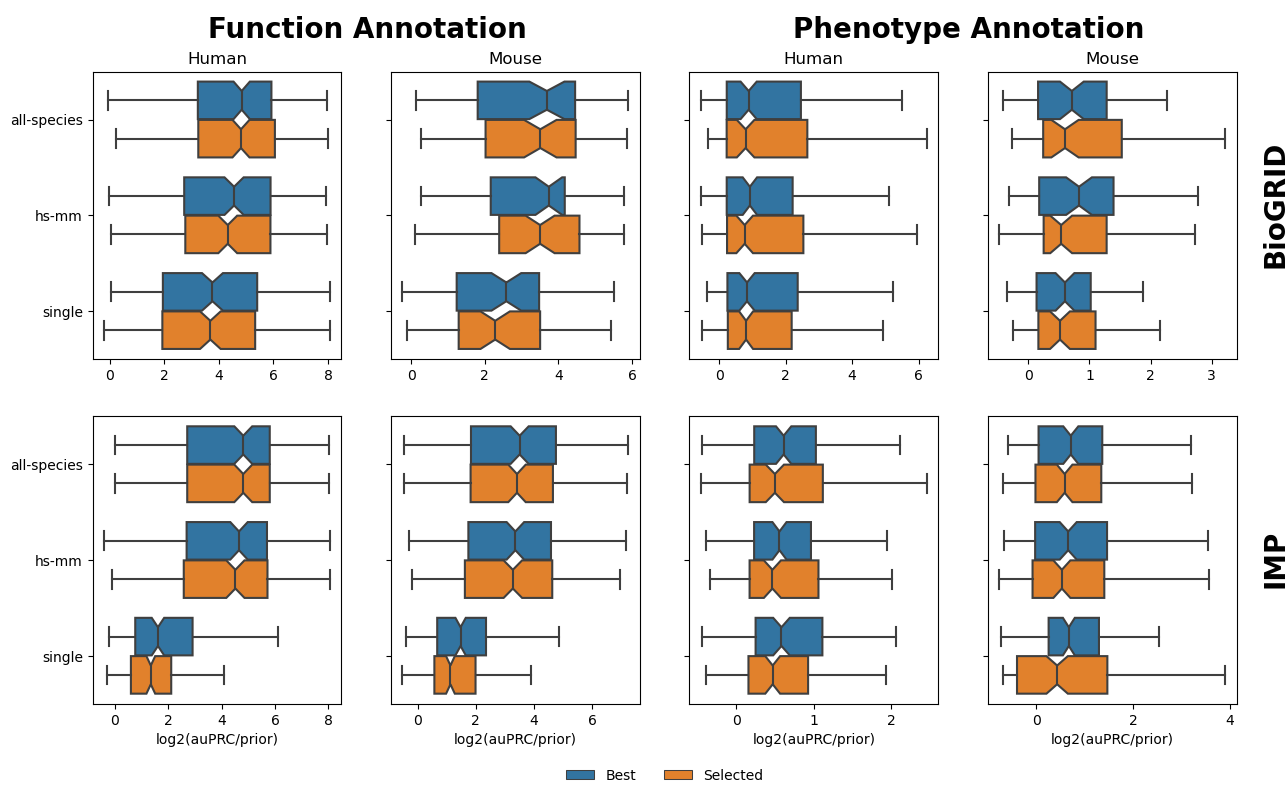

In [5]:
%%capture --no-display
make_SM_plot([[df_best_GO_hs,'hs'],[df_best_GO_mm,'mm'],[df_best_Mon_hs,'hs'],[df_best_Mon_mm,'mm']])